In [18]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import os

path = "/content/drive/MyDrive/ds_shahida_kothapalli/datasets"
print(os.listdir(path))





['trader_data.csv', 'fear_greed.csv', '.ipynb_checkpoints']


In [2]:
import os

path = "/content/drive/MyDrive/ds_shahida_kothapalli/datasets"

for f in os.listdir(path):
    size = os.path.getsize(os.path.join(path, f))
    print(f"{f} → {size} bytes")



.ipynb_checkpoints → 4096 bytes
historical_data.csv → 47516935 bytes
fear_greed_index.csv → 90801 bytes


In [3]:
import pandas as pd

sentiment = pd.read_csv('/content/drive/MyDrive/ds_shahida_kothapalli/datasets/fear_greed_index.csv')
trader = pd.read_csv('/content/drive/MyDrive/ds_shahida_kothapalli/datasets/historical_data.csv')

print("Sentiment Columns:", sentiment.columns.tolist())
print("Trader Columns:", trader.columns.tolist())


Sentiment Columns: ['timestamp', 'value', 'classification', 'date']
Trader Columns: ['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp']


In [8]:

trader['Timestamp IST'] = pd.to_datetime(
    trader['Timestamp IST'],
    format='%d-%m-%Y %H:%M'
)

trader['Timestamp'] = trader['Timestamp IST']


trader['date_only'] = trader['Timestamp'].dt.date

sentiment['date'] = pd.to_datetime(sentiment['date'])
sentiment['date_only'] = sentiment['date'].dt.date

merged = pd.merge(
    trader,
    sentiment[['date_only', 'classification']],
    on='date_only',
    how='left'
)

merged.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date_only,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,2024-12-02 22:50:00,2024-12-02,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,2024-12-02 22:50:00,2024-12-02,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,2024-12-02 22:50:00,2024-12-02,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,2024-12-02 22:50:00,2024-12-02,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,2024-12-02 22:50:00,2024-12-02,Extreme Greed


In [13]:
profit_analysis = merged.groupby('classification')['Closed PnL'].mean()
print("Average Profit by Market Sentiment:")
print(profit_analysis)
volume_analysis = merged.groupby('classification')['Size USD'].sum()
print("\nTotal Trading Volume by Market Sentiment:")
print(volume_analysis)
direction_analysis = merged.groupby(['classification','Direction']).size()
print("\n Trade Direction Patterns by Sentiment:")
print(direction_analysis)


Average Profit by Market Sentiment:
classification
Extreme Fear     34.537862
Extreme Greed    67.892861
Fear             54.290400
Greed            42.743559
Neutral          34.307718
Name: Closed PnL, dtype: float64

Total Trading Volume by Market Sentiment:
classification
Extreme Fear     1.144843e+08
Extreme Greed    1.244652e+08
Fear             4.833248e+08
Greed            2.885825e+08
Neutral          1.802421e+08
Name: Size USD, dtype: float64

 Trade Direction Patterns by Sentiment:
classification  Direction                
Extreme Fear    Buy                            807
                Close Long                    6241
                Close Short                   3117
                Long > Short                     5
                Open Long                     7005
                Open Short                    3174
                Sell                          1042
                Short > Long                     6
                Spot Dust Conversion             3


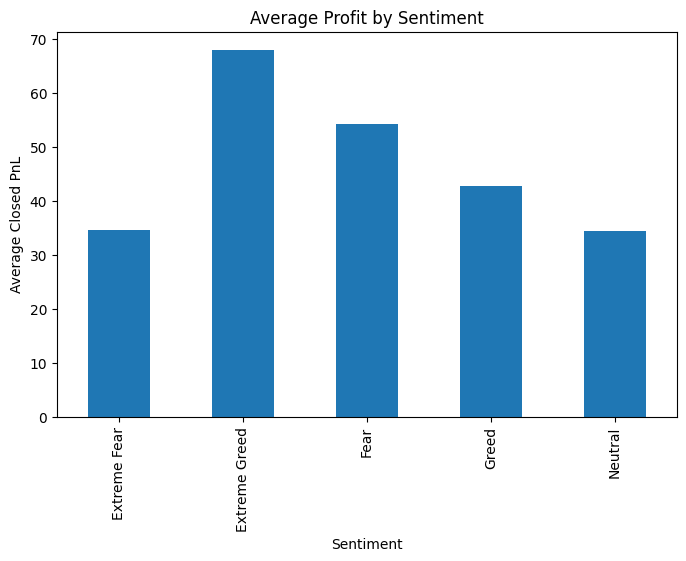

In [15]:
import matplotlib.pyplot as plt

profit_analysis = merged.groupby('classification')['Closed PnL'].mean()

profit_analysis.plot(kind='bar', title="Average Profit by Sentiment", figsize=(8,5))
plt.xlabel("Sentiment")
plt.ylabel("Average Closed PnL")


plt.savefig('/content/drive/MyDrive/ds_shahida_kothapalli/outputs/profit_by_sentiment.png')
plt.show()


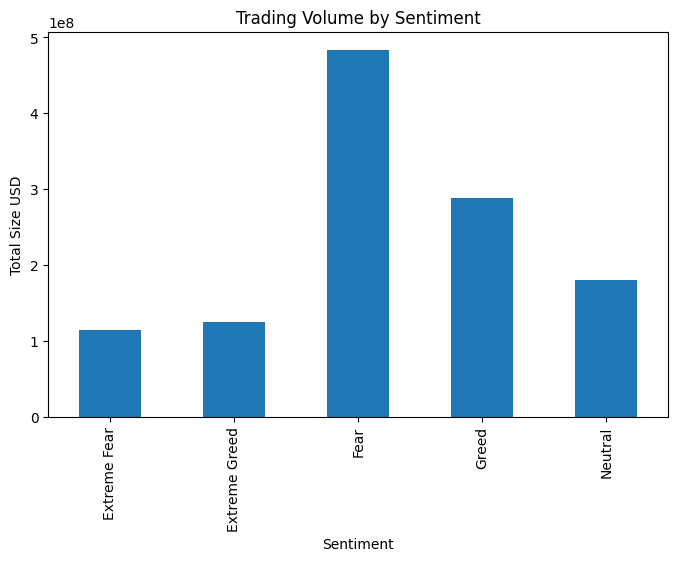

In [16]:
import matplotlib.pyplot as plt

volume_analysis = merged.groupby('classification')['Size USD'].sum()
volume_analysis.plot(kind='bar', title="Trading Volume by Sentiment", figsize=(8,5))
plt.xlabel("Sentiment")
plt.ylabel("Total Size USD")
plt.savefig('/content/drive/MyDrive/ds_shahida_kothapalli/outputs/volume_by_sentiment.png')
plt.show()


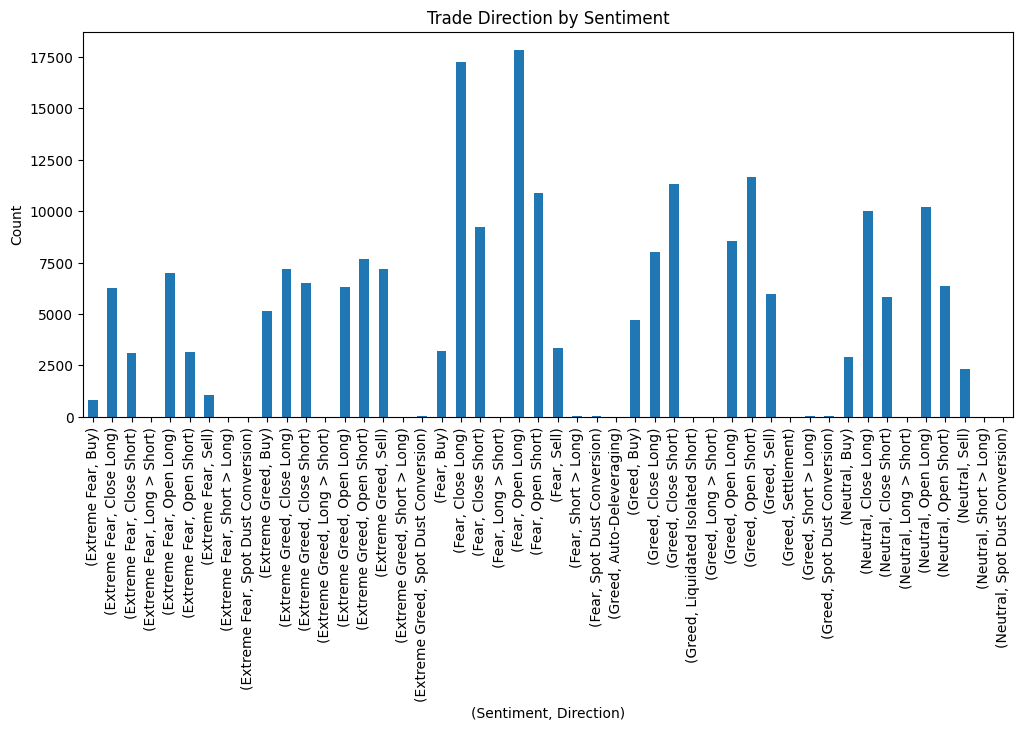

In [17]:
import matplotlib.pyplot as plt

direction_analysis = merged.groupby(['classification','Direction']).size()
direction_analysis.plot(kind='bar', title="Trade Direction by Sentiment", figsize=(12,5))
plt.xlabel("(Sentiment, Direction)")
plt.ylabel("Count")
plt.savefig('/content/drive/MyDrive/ds_shahida_kothapalli/outputs/direction_by_sentiment.png')
plt.show()
